In [2]:
 !pip uninstall tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0


In [3]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 3.8MB 37.1MB/s 
     |████████████████████████████████| 450kB 42.2MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [2]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [4]:
import tensorflow_hub as hub

mobile_net_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"
model = tf.keras.Sequential([
    hub.KerasLayer(handle=mobile_net_url, input_shape=(224, 224, 3), trainable=False)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


In [7]:
ls

sample_data/


In [8]:
cd sample_data/

/content/sample_data


In [9]:
ls

anscombe.json*                datasets/              README.md*
california_housing_test.csv   mnist_test.csv
california_housing_train.csv  mnist_train_small.csv


In [10]:
cd datasets/

/content/sample_data/datasets


In [11]:
ls

imagenetV2  imagenetv2-topimages/


In [12]:
cd imagenetv2-topimages/

/content/sample_data/datasets/imagenetv2-topimages


In [13]:
ls

0/    168/  237/  306/  376/  445/  514/  584/  653/  722/  792/  861/  930/
1/    169/  238/  307/  377/  446/  515/  585/  654/  723/  793/  862/  931/
10/   17/   239/  308/  378/  447/  516/  586/  655/  724/  794/  863/  932/
100/  170/  24/   309/  379/  448/  517/  587/  656/  725/  795/  864/  933/
101/  171/  240/  31/   38/   449/  518/  588/  657/  726/  796/  865/  934/
102/  172/  241/  310/  380/  45/   519/  589/  658/  727/  797/  866/  935/
103/  173/  242/  311/  381/  450/  52/   59/   659/  728/  798/  867/  936/
104/  174/  243/  312/  382/  451/  520/  590/  66/   729/  799/  868/  937/
105/  175/  244/  313/  383/  452/  521/  591/  660/  73/   8/    869/  938/
106/  176/  245/  314/  384/  453/  522/  592/  661/  730/  80/   87/   939/
107/  177/  246/  315/  385/  454/  523/  593/  662/  731/  800/  870/  94/
108/  178/  247/  316/  386/  455/  524/  594/  663/  732/  801/  871/  940/
109/  179/  248/  317/  387/  456/  525/  595/  664/  733/  802/  872/  941/


In [33]:
cd ..

/content/sample_data/datasets/imagenetv2-topimages


In [34]:
cd 27/

/content/sample_data/datasets/imagenetv2-topimages/27


In [35]:
ls

0.jpeg  1.jpeg  2.jpeg  3.jpeg  4.jpeg  5.jpeg  6.jpeg  7.jpeg  8.jpeg  9.jpeg


In [0]:
import matplotlib.pyplot as plt

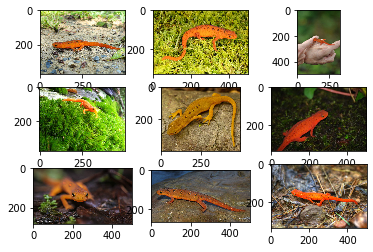

In [36]:
for c in range(9):
  plt.subplot(3,3,c+1)
  plt.imshow(plt.imread('{}.jpeg'.format(c)))
plt.show()

In [6]:
import os
import pathlib
content_data_url = '/content/sample_data'
data_root_orig = tf.keras.utils.get_file('imagenetV2', 'https://s3-us-west-2.amazonaws.com/imagenetv2public/imagenetv2-topimages.tar.gz', cache_dir=content_data_url, extract=True)
data_root = pathlib.Path(content_data_url + '/datasets/imagenetv2-topimages')
print(data_root)

606355456/606351360 [==============================] - 15s 0us/step
/content/sample_data/datasets/imagenetv2-topimages


In [0]:
label_file = tf.keras.utils.get_file('label', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
label_text = None
with open(label_file, 'r') as f:
    label_text = f.read().split('\n')[:-1]

image_count: 10000


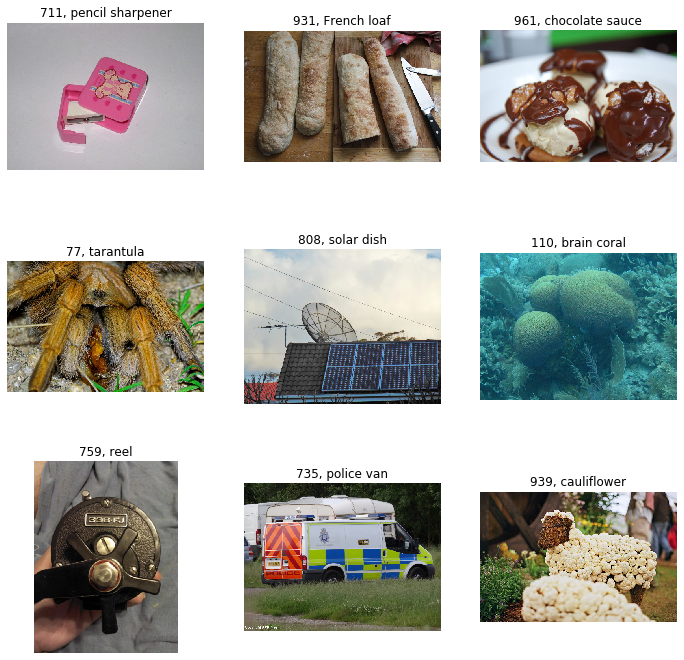

In [39]:
import PIL.Image as Image
import matplotlib.pyplot as plt
import random

all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
# 이미지를 랜덤하게 섞습니다.
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
print('image_count:', image_count)

plt.figure(figsize=(12,12))
for c in range(9):
    image_path = random.choice(all_image_paths)
    plt.subplot(3,3,c+1)
    plt.imshow(plt.imread(image_path))
    idx = int(image_path.split('/')[-2]) + 1
    plt.title(str(idx) + ', ' + label_text[idx])
    plt.axis('off')
plt.show()

In [0]:
import numpy as np

In [42]:
import cv2

top_1 = 0
top_5 = 0
for image_path in all_image_paths:
    img = cv2.imread(image_path)
    img = cv2.resize(img, dsize=(224, 224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    top_5_predict = model.predict(img)[0].argsort()[::-1][:5]
    idx = int(image_path.split('/')[-2])+1
    if idx in top_5_predict:
        top_5 += 1
        if top_5_predict[0] == idx:
            top_1 += 1

print('Top-5 correctness:', top_5 / len(all_image_paths) * 100, '%')
print('Top-1 correctness:', top_1 / len(all_image_paths) * 100, '%')

Top-5 correctness: 83.84 %
Top-1 correctness: 59.45 %


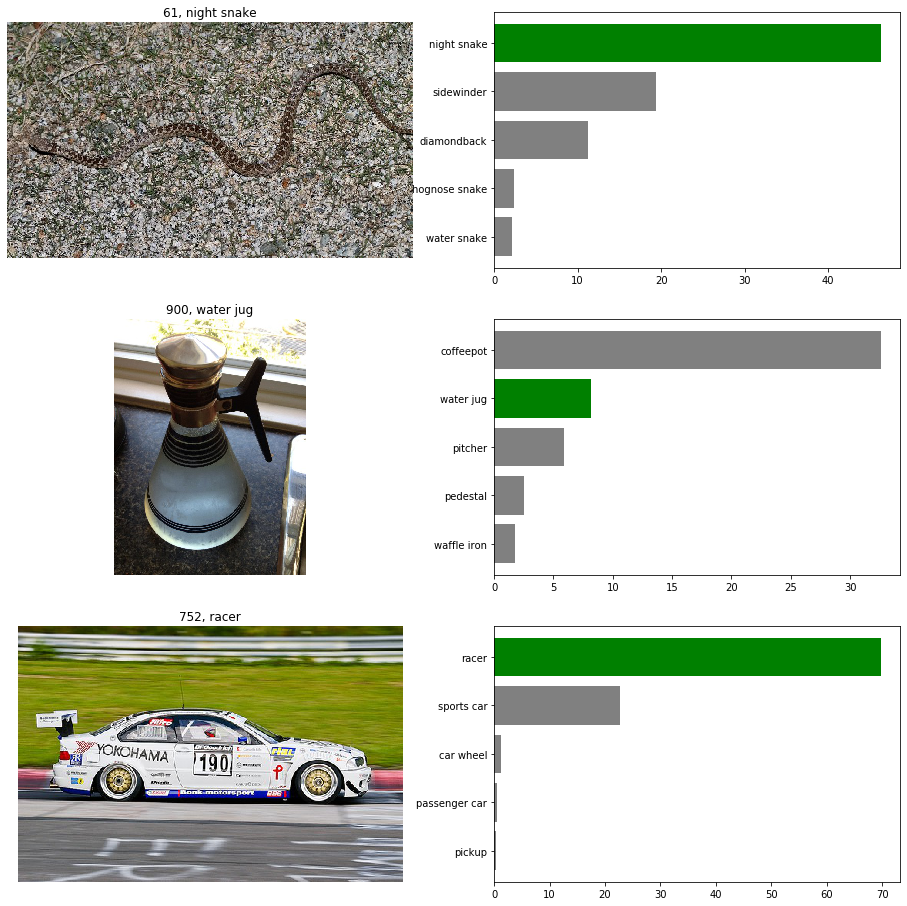

In [57]:
plt.figure(figsize=(16,16))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)
  
for c in range(3):
    image_path = random.choice(all_image_paths)
    
    # 이미지 표시
    plt.subplot(3,2,c*2+1)
    plt.imshow(plt.imread(image_path))
    idx = int(image_path.split('/')[-2]) + 1
    plt.title(str(idx) + ', ' + label_text[idx])
    plt.axis('off')
    
    # 예측값 표시
    plt.subplot(3,2,c*2+2)
    img = cv2.imread(image_path)
    img = cv2.resize(img, dsize=(224, 224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    
    # MobileNet을 이용한 예측
    logits = model.predict(img)[0]
    prediction = softmax(logits)
    
    # 가장 높은 확률의 예측값 5개를 뽑음
    top_5_predict = prediction.argsort()[::-1][:5]
    labels = [label_text[index] for index in top_5_predict]
    color = ['gray'] * 5
    if idx in top_5_predict:
        color[top_5_predict.tolist().index(idx)] = 'green'
    color = color[::-1]
    plt.barh(range(5), prediction[top_5_predict][::-1] * 100, color=color)
    plt.yticks(range(5), labels[::-1])

In [58]:
!pip install kaggle

In [3]:
tf.keras.utils.get_file('/content/labels.csv', 'http://bit.ly/2GDxsYS')
tf.keras.utils.get_file('/content/sample_submission.csv', 'http://bit.ly/2GGnMNd')
tf.keras.utils.get_file('/content/train.zip', 'http://bit.ly/31nIyel')
tf.keras.utils.get_file('/content/test.zip', 'http://bit.ly/2GHEsnO')

import os
os.environ['KAGGLE_USERNAME'] = 'kimhaggie' # 독자의 캐글 ID
os.environ['KAGGLE_KEY'] = 'bf6a513484128eb597cf644e867f53d7' # 독자의 캐글 API Token

362848256/362841195 [==============================] - 8s 0us/step


In [4]:
!unzip train.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/841463629c4833816e216cbb041c2778.jpg  
  inflating: train/8429dcca4ae91c4e0

In [5]:
import pandas as pd
label_text = pd.read_csv('labels.csv')
label_text.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


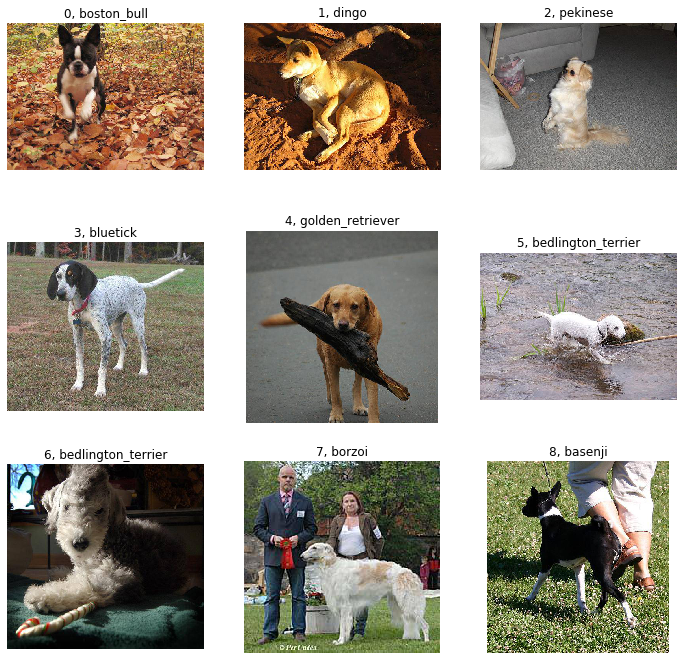

In [69]:
import PIL.Image as Image
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
for c in range(9):
    image_id = label_text.loc[c, 'id']
    plt.subplot(3,3,c+1)
    plt.imshow(plt.imread('/content/train/' + image_id + '.jpg'))
    plt.title(str(c) + ', ' + label_text.loc[c, 'breed'])
    plt.axis('off')
plt.show()

In [6]:
from tensorflow.keras.applications import MobileNetV2
mobilev2 = MobileNetV2()

14540800/14536120 [==============================] - 0s 0us/step


In [0]:
import numpy as np

In [0]:

# 8.15 MobileNet V2의 가중치 초기화
for layer in mobilev2.layers[:-1]:
    layer.trainable = True
    
for layer in mobilev2.layers[:-1]: 
    if 'kernel' in layer.__dict__:
        kernel_shape = np.array(layer.get_weights()).shape
        # weight를 평균이 0, 표준편차가 1인 random 변수로 초기화
        layer.set_weights(tf.random.normal(kernel_shape, 0, 1))

In [10]:

# 8.16 train 데이터를 메모리에 로드
import cv2

train_X = []
for i in range(len(label_text)):
    img = cv2.imread('/content/train/' + label_text['id'][i] + '.jpg')
    img = cv2.resize(img, dsize=(224, 224))
    img = img / 255.0
    train_X.append(img)
train_X = np.array(train_X)
print(train_X.shape)
print(train_X.size * train_X.itemsize, ' bytes')

(10222, 224, 224, 3)
12309577728  bytes


In [0]:
unique_Y = label_text['breed'].unique().tolist()
train_Y = [unique_Y.index(breed) for breed in label_text['breed']]
train_Y = np.array(train_Y)

In [14]:
x = mobilev2.layers[-2].output
predictions = tf.keras.layers.Dense(120, activation='softmax')(x)
model = tf.keras.Model(inputs=mobilev2.input, outputs=predictions)

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [15]:
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25, batch_size=32)

Train on 7666 samples, validate on 2556 samples
Epoch 1/10
7666/7666 [==============================] - 54s 7ms/sample - loss: 4.8967 - accuracy: 0.0098 - val_loss: 8.6889 - val_accuracy: 0.0117
Epoch 2/10
7666/7666 [==============================] - 41s 5ms/sample - loss: 4.8576 - accuracy: 0.0093 - val_loss: 7.8606 - val_accuracy: 0.0102
Epoch 3/10
7666/7666 [==============================] - 41s 5ms/sample - loss: 4.8238 - accuracy: 0.0129 - val_loss: 8.6052 - val_accuracy: 0.0063
Epoch 4/10
7666/7666 [==============================] - 41s 5ms/sample - loss: 4.8010 - accuracy: 0.0141 - val_loss: 7.9484 - val_accuracy: 0.0102
Epoch 5/10
7666/7666 [==============================] - 41s 5ms/sample - loss: 4.7819 - accuracy: 0.0167 - val_loss: 10.2055 - val_accuracy: 0.0090
Epoch 6/10
7666/7666 [==============================] - 41s 5ms/sample - loss: 4.7821 - accuracy: 0.0194 - val_loss: 8.2650 - val_accuracy: 0.0078
Epoch 7/10
7666/7666 [==============================] - 41s 5ms/sampl

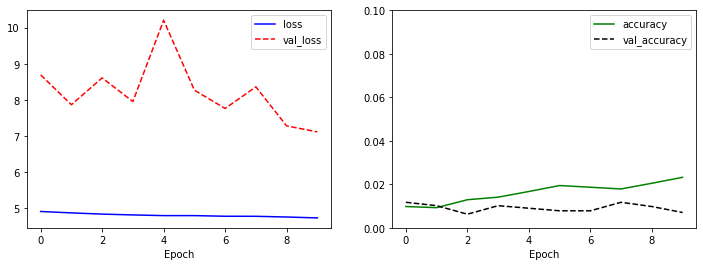

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 0.1)
plt.legend()

plt.show()

In [17]:
from tensorflow.keras.applications import MobileNetV2
mobilev2 = MobileNetV2()

x = mobilev2.layers[-2].output
predictions = tf.keras.layers.Dense(120, activation='softmax')(x)
model = tf.keras.Model(inputs=mobilev2.input, outputs=predictions)

# 뒤에서 20개까지의 레이어는 훈련 가능, 나머지는 가중치 고정
for layer in model.layers[:-20]:
    layer.trainable = False
for layer in model.layers[-20:]:
    layer.trainable = True

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

In [18]:
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25, batch_size=32)

Train on 7666 samples, validate on 2556 samples
Epoch 1/10
7666/7666 [==============================] - 16s 2ms/sample - loss: 3.4448 - accuracy: 0.2522 - val_loss: 2.2602 - val_accuracy: 0.3905
Epoch 2/10
7666/7666 [==============================] - 13s 2ms/sample - loss: 1.7951 - accuracy: 0.5687 - val_loss: 1.7658 - val_accuracy: 0.5149
Epoch 3/10
7666/7666 [==============================] - 13s 2ms/sample - loss: 1.3224 - accuracy: 0.6752 - val_loss: 1.6722 - val_accuracy: 0.5223
Epoch 4/10
7666/7666 [==============================] - 13s 2ms/sample - loss: 1.0633 - accuracy: 0.7412 - val_loss: 1.6257 - val_accuracy: 0.5372
Epoch 5/10
7666/7666 [==============================] - 13s 2ms/sample - loss: 0.8812 - accuracy: 0.7883 - val_loss: 1.6150 - val_accuracy: 0.5540
Epoch 6/10
7666/7666 [==============================] - 13s 2ms/sample - loss: 0.7515 - accuracy: 0.8300 - val_loss: 1.6085 - val_accuracy: 0.5536
Epoch 7/10
7666/7666 [==============================] - 13s 2ms/sample

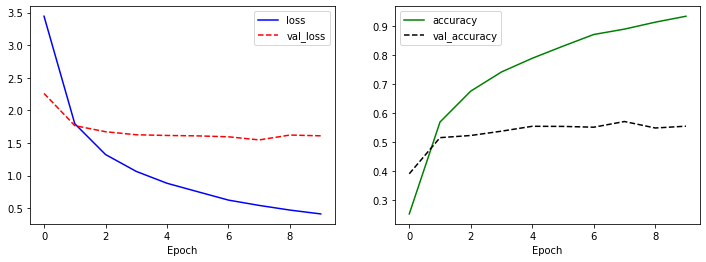

In [22]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()